# So what is Attrition and what determines it?

Attrition: It is basically the turnover rate of employees inside an organization. 

This can happen for many reasons:

1) Employees looking for better opportunities.

2) A negative working environment.

3) Bad management

4) Sickness of an employee (or even death)

5) Excessive working hours


# Import The Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

# Load the Dataset

In [44]:
df2 = pd.read_csv("/Users\siddh\Downloads\HR-Employee-Attrition.csv")
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [45]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df2.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [47]:
df2.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [48]:
df2.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [49]:
#check for null values
df2.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [50]:
#check for duplicate values
df2.duplicated().sum()

0

In [51]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [52]:
#check the shape
df2.shape

(1470, 35)

In [53]:
#dataset information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
#maximum values of the attributes
df2.max()

Age                                           60
Attrition                                    Yes
BusinessTravel                     Travel_Rarely
DailyRate                                   1499
Department                                 Sales
DistanceFromHome                              29
Education                                      5
EducationField                  Technical Degree
EmployeeCount                                  1
EmployeeNumber                              2068
EnvironmentSatisfaction                        4
Gender                                      Male
HourlyRate                                   100
JobInvolvement                                 4
JobLevel                                       5
JobRole                     Sales Representative
JobSatisfaction                                4
MaritalStatus                             Single
MonthlyIncome                              19999
MonthlyRate                                26999
NumCompaniesWorked  

In [55]:
#minimum values of the attributes
df2.min()

Age                                                18
Attrition                                          No
BusinessTravel                             Non-Travel
DailyRate                                         102
Department                            Human Resources
DistanceFromHome                                    1
Education                                           1
EducationField                        Human Resources
EmployeeCount                                       1
EmployeeNumber                                      1
EnvironmentSatisfaction                             1
Gender                                         Female
HourlyRate                                         30
JobInvolvement                                      1
JobLevel                                            1
JobRole                     Healthcare Representative
JobSatisfaction                                     1
MaritalStatus                                Divorced
MonthlyIncome               

# Summary:

Dataset Structure: 1470 observations (rows), 35 features (variables)
    
Missing Data: Luckily for us, there is no missing data! this will make it easier to work with the dataset.
    
Data Type: We only have two datatypes in this dataset: objects and integers
        
Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!

Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

# Data exploration and preprocessing

In [56]:
#check for unique values in each column
for column in df2.columns:
    print(f"{column}: Number of unique values {df2[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that ‘EmployeeCount’, ‘Over18’, ‘StandardHours’ have only one unique values and ‘EmployeeNumber’ has 1470 unique values. This features aren’t useful for us, So we are going to drop those columns.

In [57]:
#Drop irrelevant columns
df2.drop(['StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


# Encode Categorical Values

In [61]:
df1=df2.replace('No','0').replace('Yes','1')

In [62]:
df = pd.get_dummies(df1, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,0,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,0,155,4,3,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,0,1023,2,3,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


# Check for Outliers

In [63]:
mean = df.mean()
std = df.std()

C:\Users\siddh\AppData\Local\Temp\ipykernel_15484\2238495555.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()


In [64]:
# Calculate the upper and lower bounds for each column
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

In [65]:
# Identify the outliers for each column
outliers = {}
for col in df.columns:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

In [66]:
# Print the outliers for each column
for col, df_outliers in outliers.items():
    print(f"Outliers in {col}:")
    print(df_outliers)

Outliers in Age:
Empty DataFrame
Columns: [Age, Attrition, DailyRate, DistanceFromHome, Education, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Non-Travel, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Human Resources, Department_Research & Development, Department_Sales, EducationField_Human Resources, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Female, Gender_Male, JobRole_Healthcare Representative, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director,

In [67]:
# Alternatively, remove the outliers from the dataset
df_no_outliers = df[~df.isin(outliers)].dropna()
df_no_outliers

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1
0,41,1,1102,1,2,1,2,94,3,2,...,0.0,0.0,0,1,0.0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0.0,0.0,1,0,0.0,0,1,0,1,0
3,33,0,1392,3,4,5,4,56,3,1,...,0.0,0.0,1,0,0.0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0.0,0.0,0,0,0.0,0,1,0,1,0
5,32,0,1005,2,2,8,4,79,3,1,...,0.0,0.0,0,0,0.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,50,1,410,28,3,2055,4,39,2,3,...,0.0,0.0,0,1,0.0,1,0,0,0,1
1462,39,0,722,24,1,2056,2,60,2,4,...,0.0,0.0,0,1,0.0,0,1,0,1,0
1465,36,0,884,23,2,2061,3,41,4,2,...,0.0,0.0,0,0,0.0,0,1,0,1,0
1468,49,0,1023,2,3,2065,4,63,2,2,...,0.0,0.0,0,1,0.0,0,1,0,1,0


In [68]:
df_new = df_no_outliers  

# Univariate Analysis

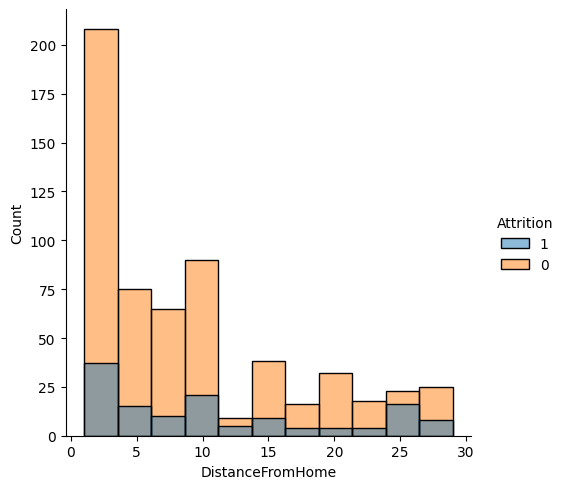

In [69]:
#Does the DistancefromHome affects the Attrition Rate?
sns.displot(df_new, x="DistanceFromHome", hue ="Attrition")

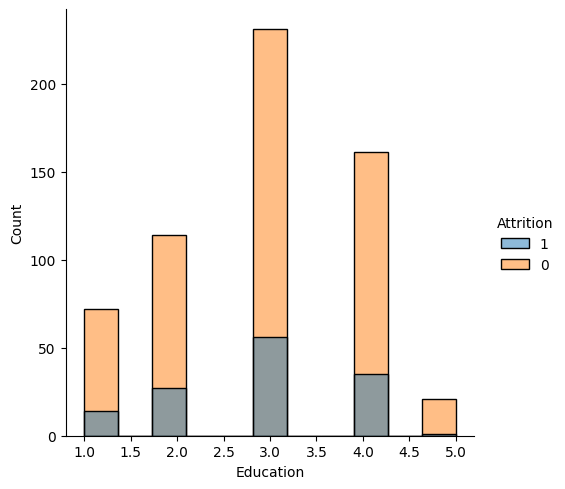

In [70]:
#Is Education the main factor towards employee attrition?
sns.displot(data=df_new, x="Education", hue="Attrition")

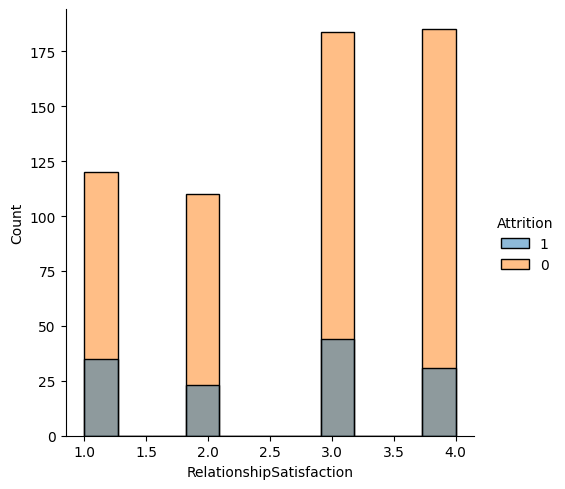

In [71]:
#Does Relationship Satisfaction plays a role in leaving the company?
sns.displot(df_new, x="RelationshipSatisfaction", hue="Attrition")

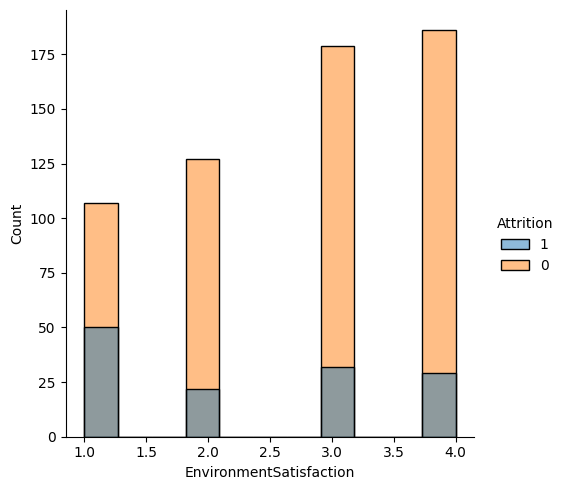

In [72]:
#Does EnvironmentSatisfaction plays a role in leaving the company?
sns.displot(df_new, x="EnvironmentSatisfaction", hue="Attrition")

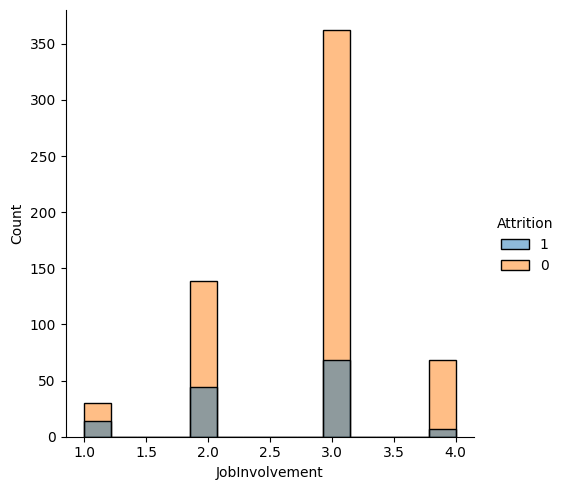

In [73]:
#Is JobInvolvemen the main factor towards employee attrition?
sns.displot(data=df_new, x="JobInvolvement", hue="Attrition")

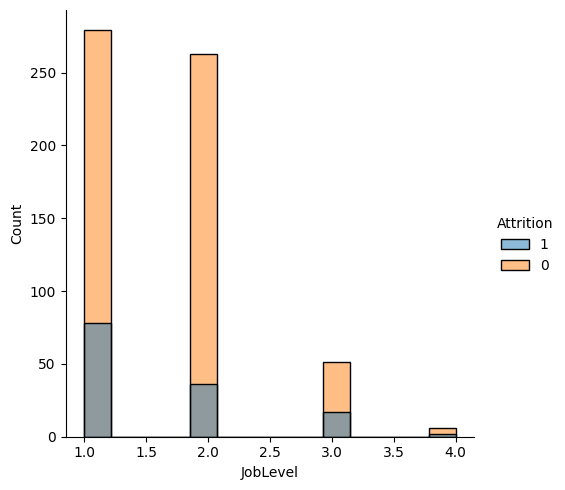

In [74]:
#Is JobLevel the main factor towards employee attrition?
sns.displot(data=df_new, x="JobLevel", hue="Attrition")

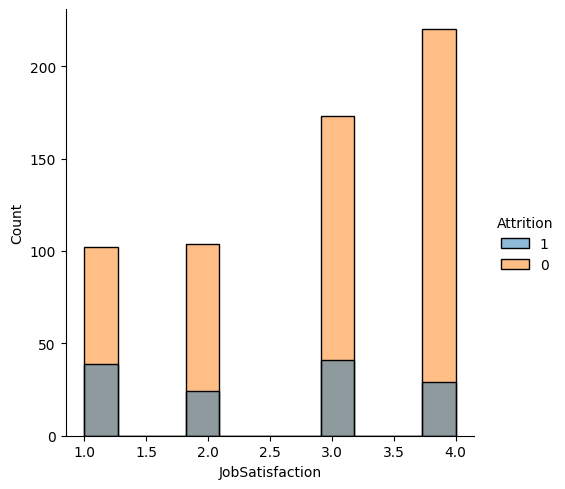

In [75]:
#Is JobSatisfaction the main factor towards employee attrition?
sns.displot(data=df_new, x="JobSatisfaction", hue="Attrition")

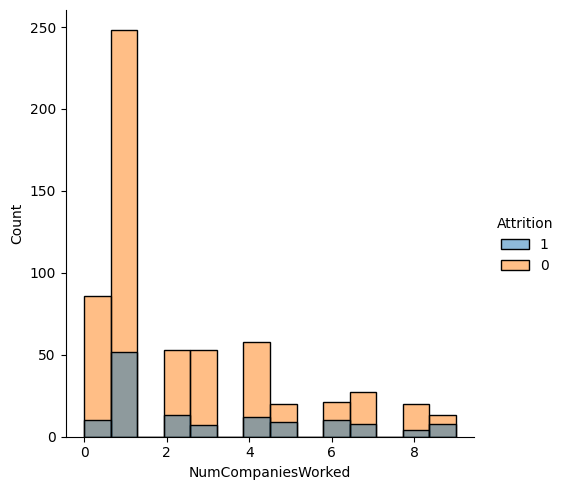

In [76]:
#Is NumCompaniesWorked the main factor towards employee attrition?
sns.displot(data=df_new, x="NumCompaniesWorked", hue="Attrition")

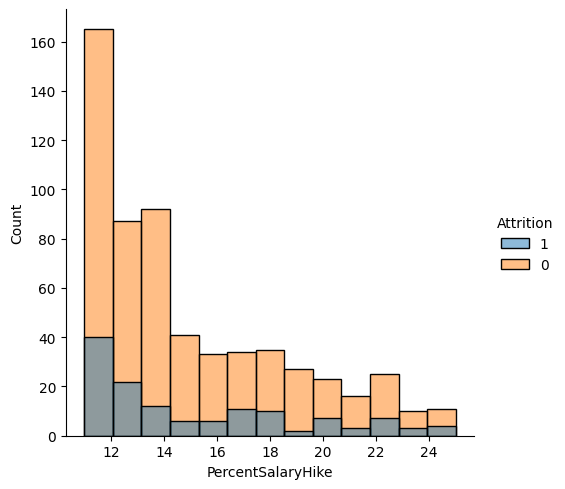

In [77]:
#Is PercentSalaryHike the main factor towards employee attrition?
sns.displot(data=df_new, x="PercentSalaryHike", hue="Attrition")

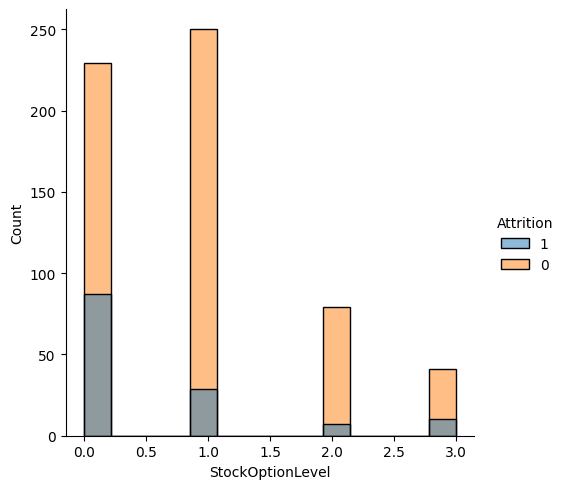

In [78]:
#Is StockOptionLevel the main factor towards employee attrition?
sns.displot(data=df_new, x="StockOptionLevel", hue="Attrition")

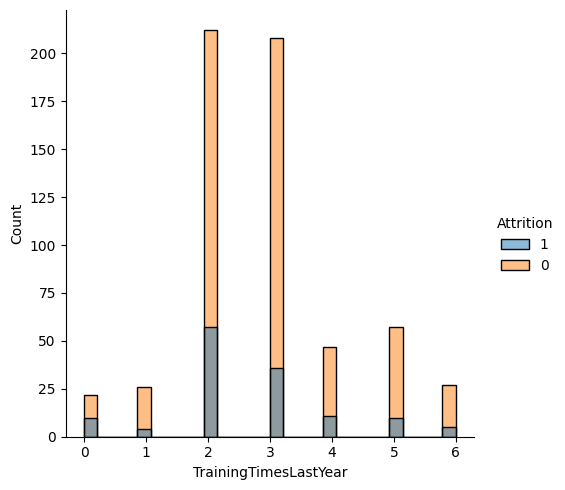

In [79]:
#Is TrainingTimesLastYear the main factor towards employee attrition?
sns.displot(data=df_new, x="TrainingTimesLastYear", hue="Attrition")

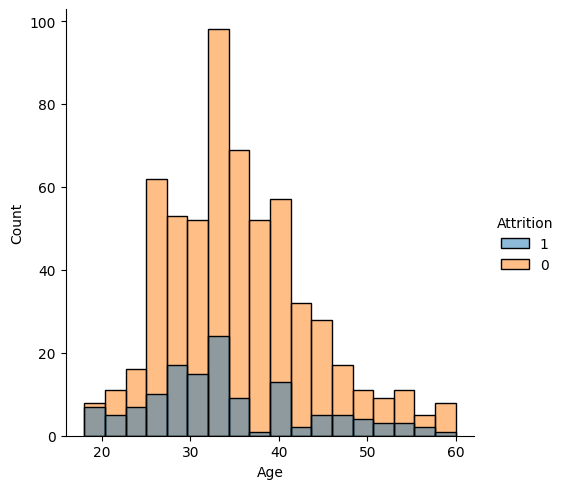

In [80]:
# How is attrition dependent on Age?
sns.displot(df_new, x="Age", hue="Attrition")

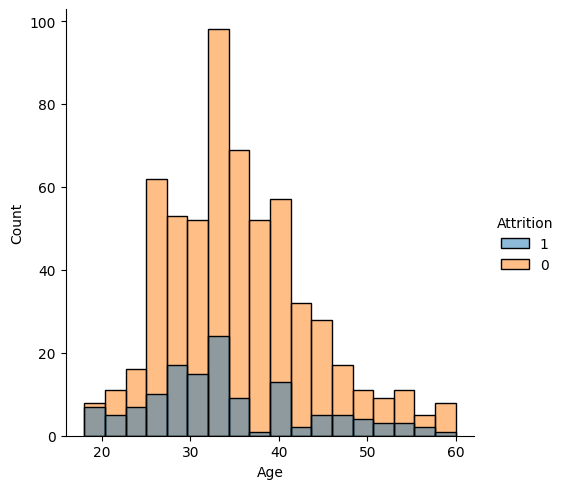

In [81]:
sns.displot(df_new, x="Age", hue="Attrition")

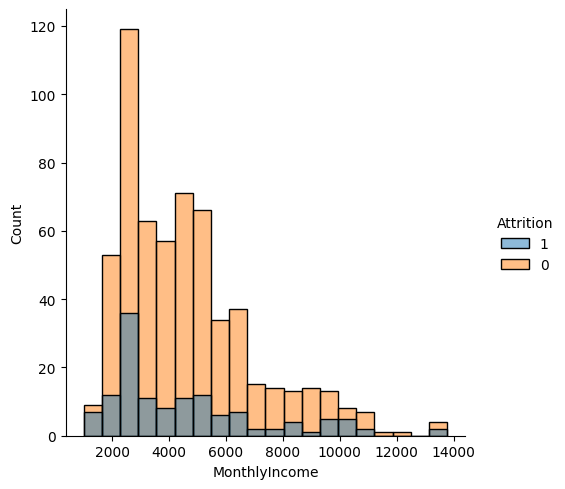

In [82]:
#Is income the main factor towards employee attrition?
sns.displot(data=df_new, x="MonthlyIncome", hue="Attrition")

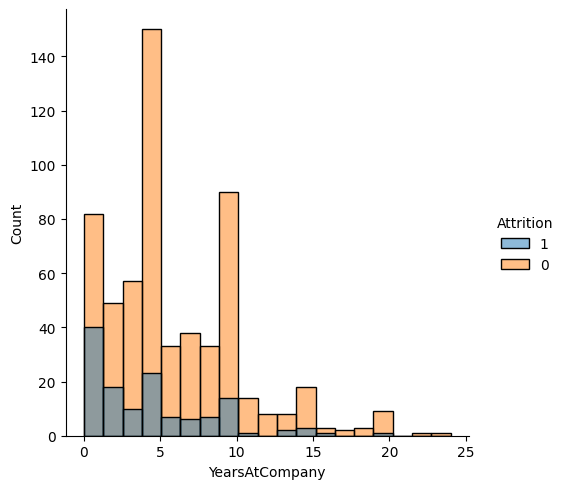

In [83]:
#Is income the main factor towards employee attrition?
sns.displot(data=df_new, x="YearsAtCompany", hue="Attrition")

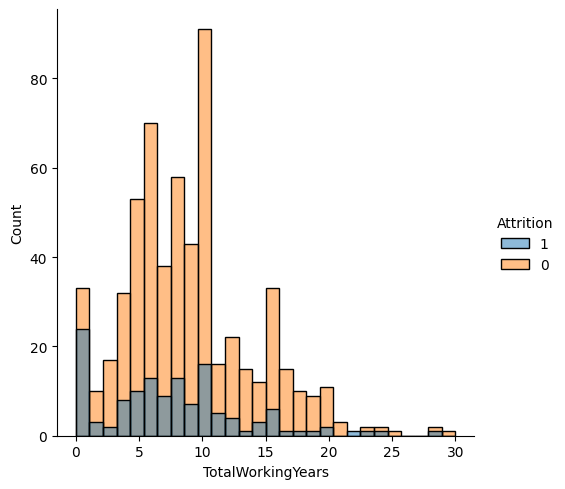

In [84]:
#Is income the main factor towards employee attrition?
sns.displot(data=df_new, x="TotalWorkingYears", hue="Attrition")

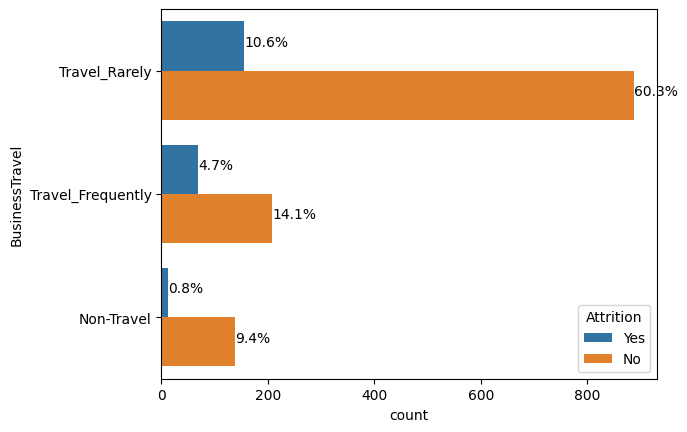

In [103]:
#Does the BusinessTravel of work impact attrition?
total = len(df2['BusinessTravel'])
ax = sns.countplot(y="BusinessTravel", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

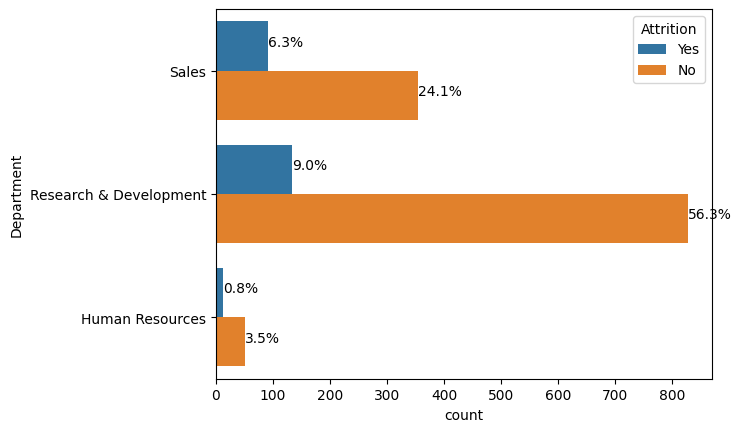

In [104]:
#Does the Department of work impact attrition?
total = len(df2['Department'])
ax = sns.countplot(y="Department", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

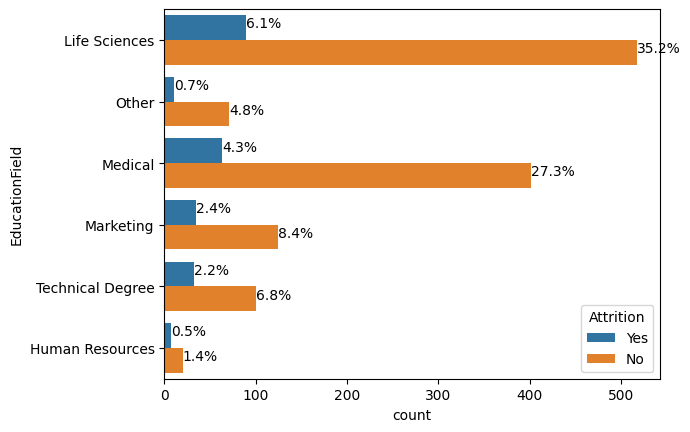

In [105]:
#Does the EducationField of work impact attrition?
total = len(df2['EducationField'])
ax = sns.countplot(y="EducationField", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

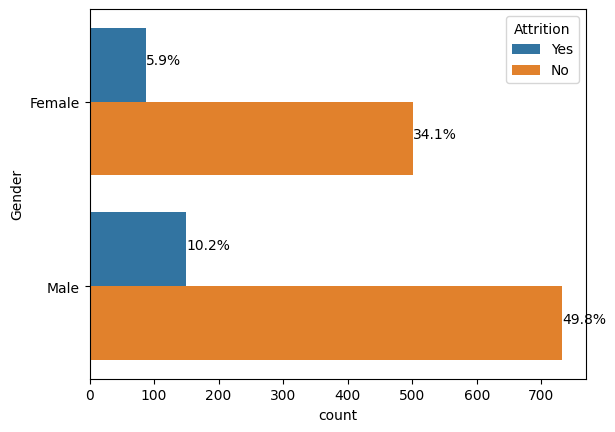

In [106]:
#Does the Gender of work impact attrition?
total = len(df2['Gender'])
ax = sns.countplot(y="Gender", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

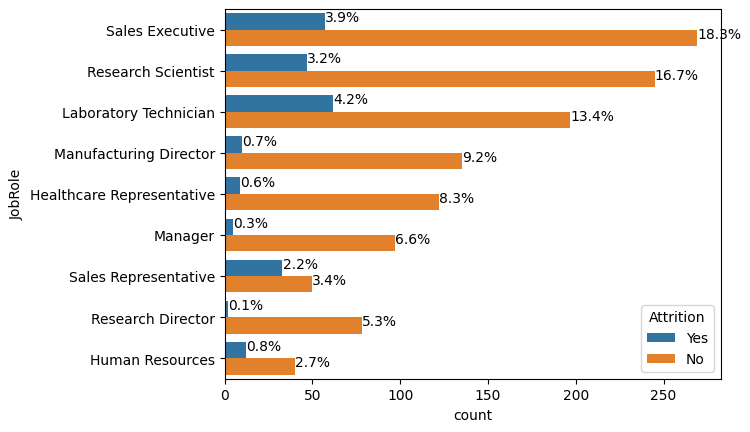

In [107]:
#Does the JobRole of work impact attrition?
total = len(df2['JobRole'])
ax = sns.countplot(y="JobRole", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

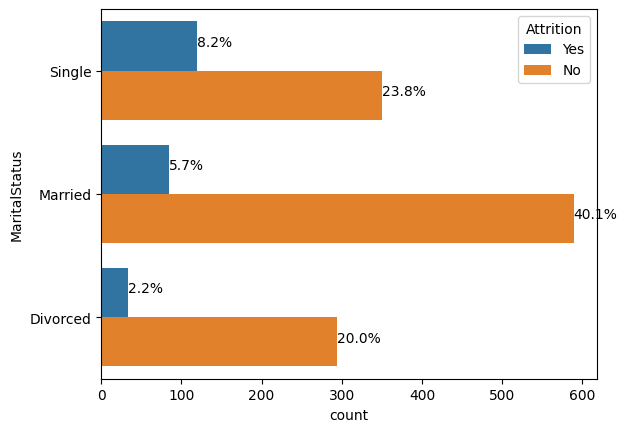

In [108]:
#Does the MaritalStatus of work impact attrition?
total = len(df2['MaritalStatus'])
ax = sns.countplot(y="MaritalStatus", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

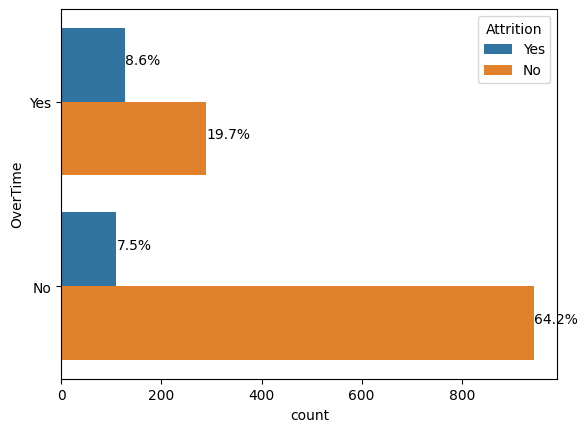

In [109]:
#Does the OverTime of work impact attrition?
total = len(df2['OverTime'])
ax = sns.countplot(y="OverTime", data=df2,hue="Attrition")
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

# Conclusions:
It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the determination of Attrition of employees.
The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others

# Correlation and Bi-Variate Analysis

C:\Users\siddh\AppData\Local\Temp\ipykernel_15484\159924279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


<Axes: >

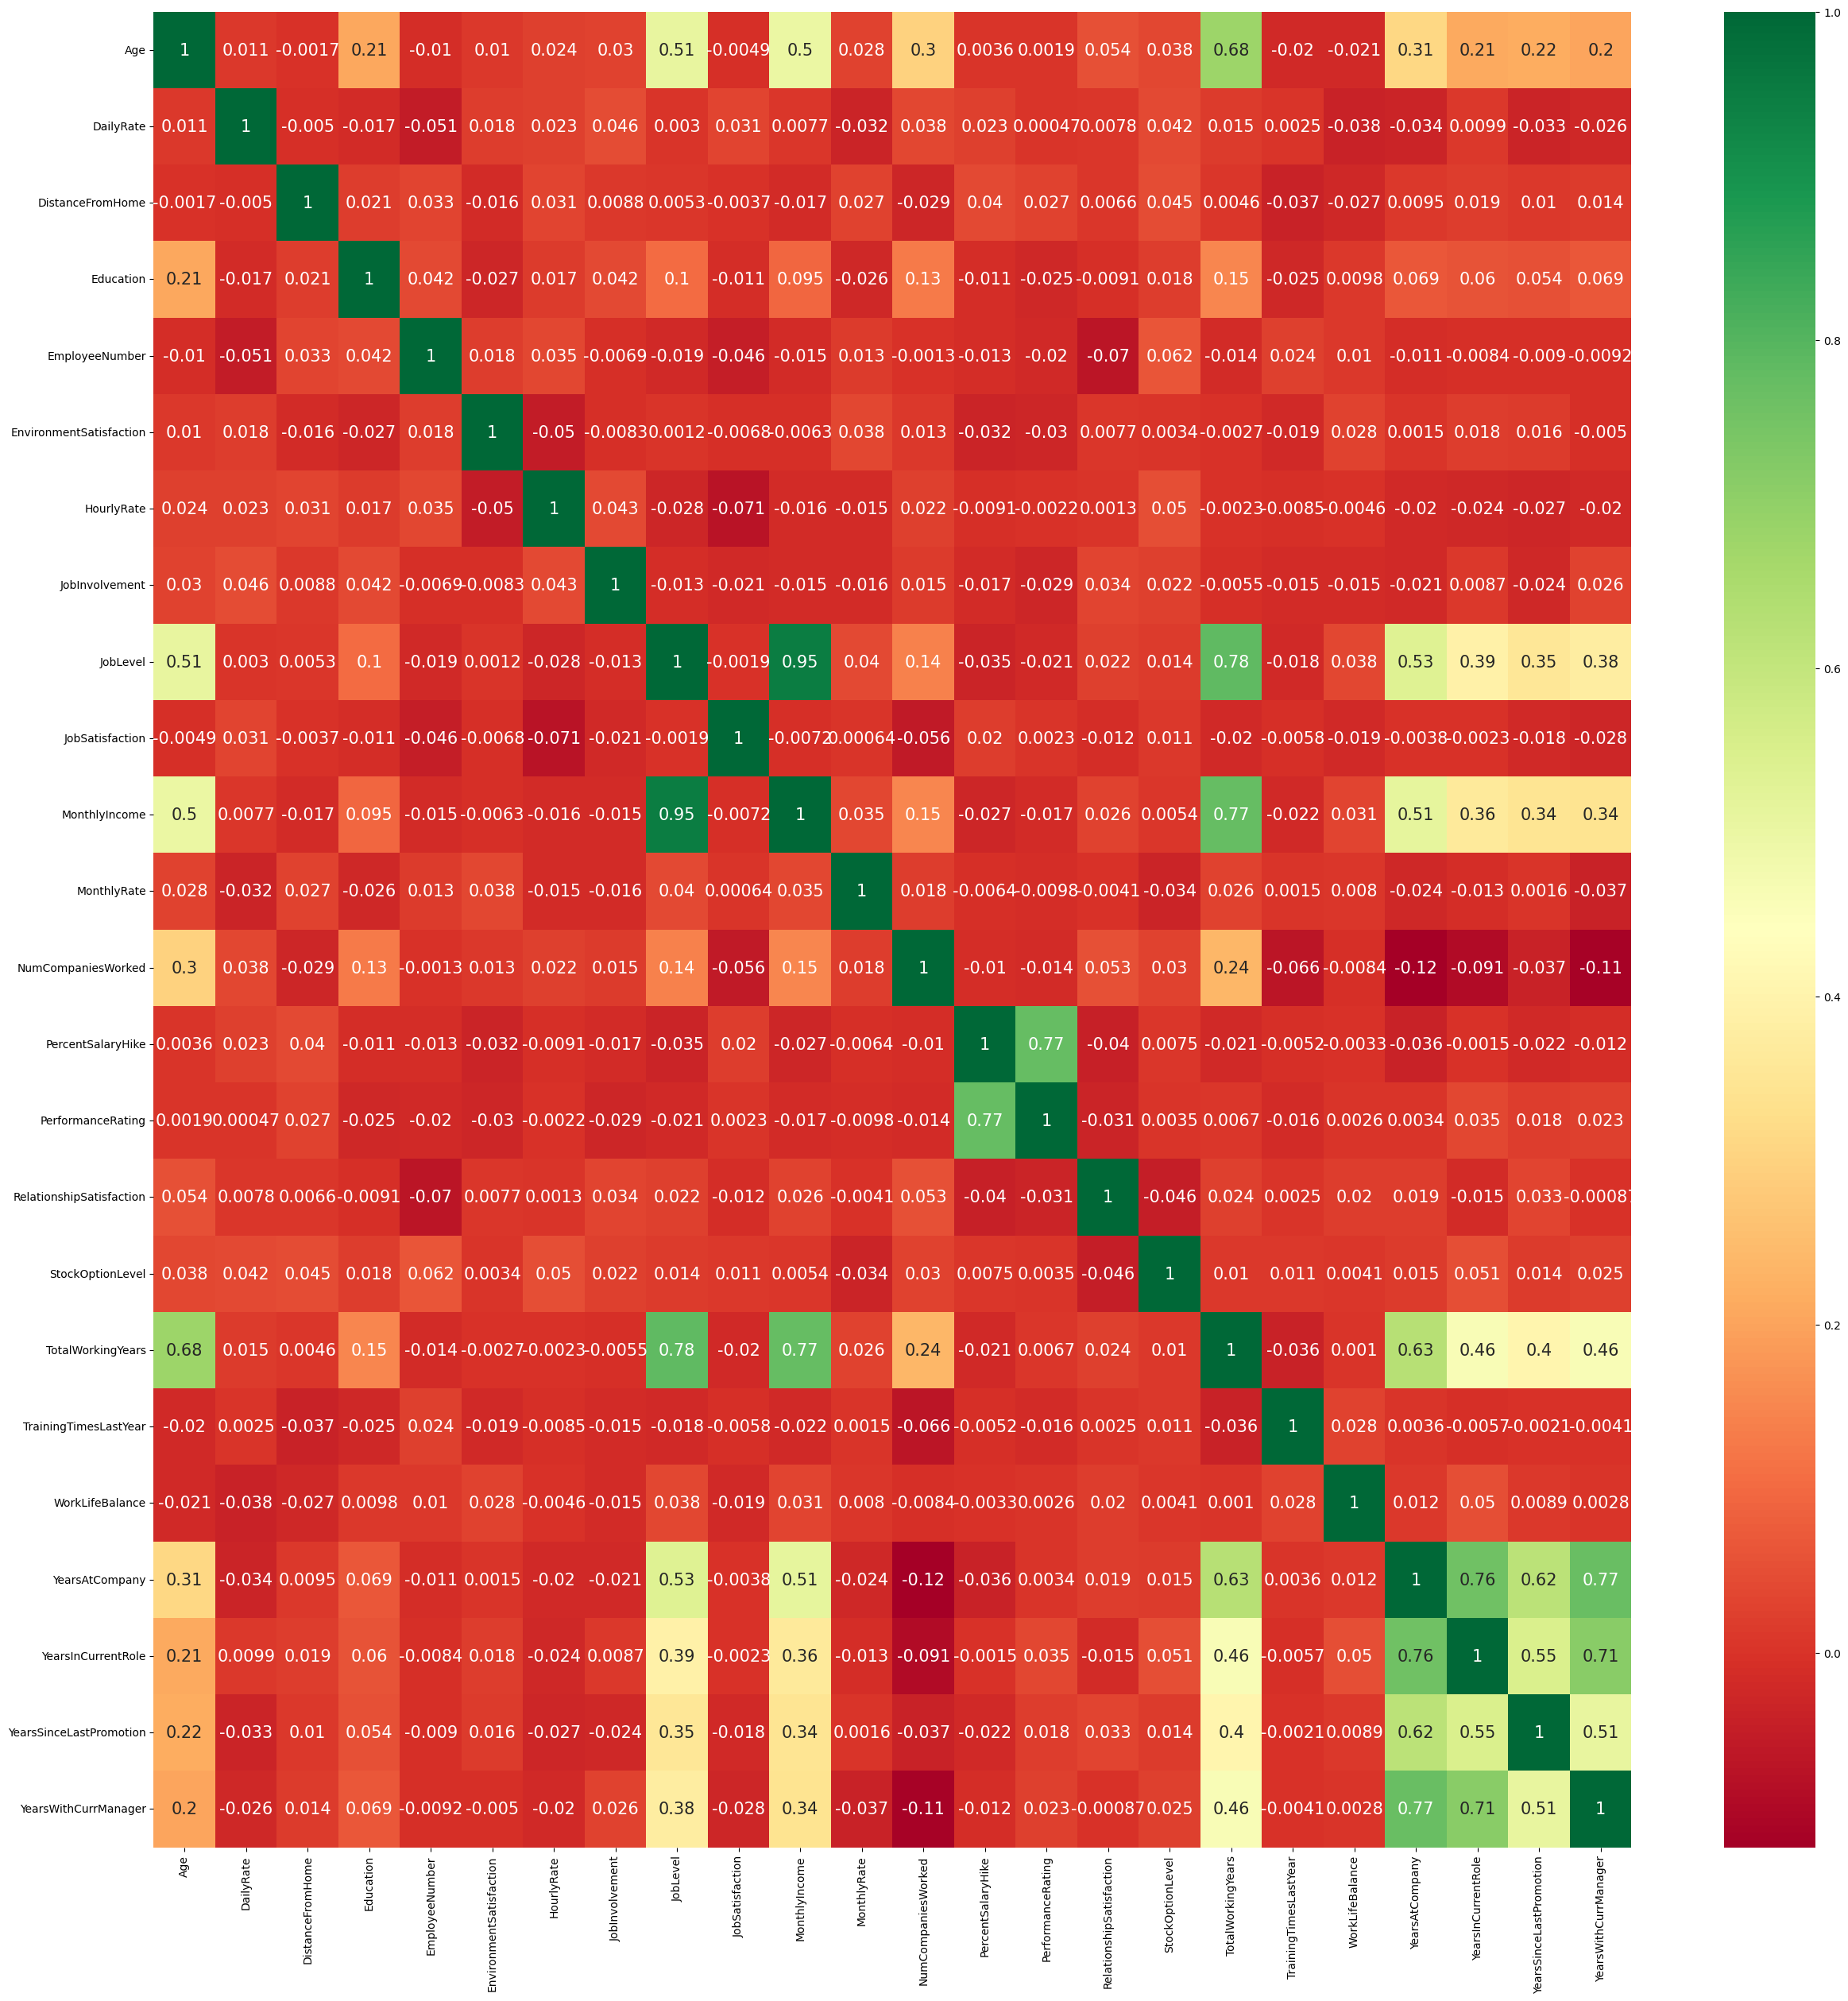

In [110]:
plt.figure(figsize=(30, 30))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

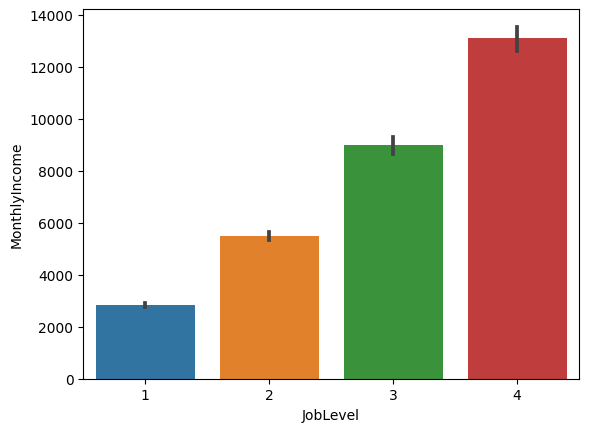

In [111]:
#How JobLevel is related to MonthlyIncome?
sns.barplot(data=df_new, x="JobLevel", y="MonthlyIncome")

<Axes: xlabel='TotalWorkingYears', ylabel='JobLevel'>

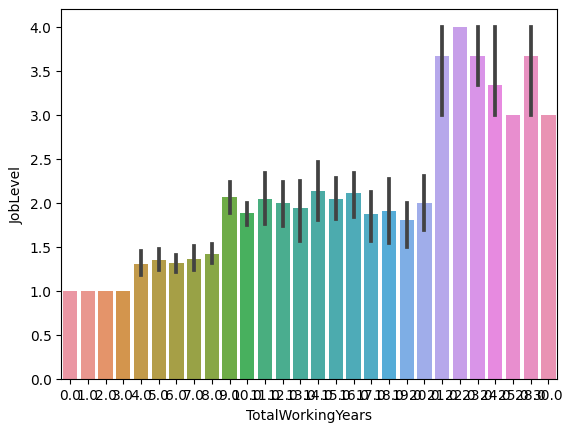

In [112]:
#How TotalWorkingYears related to JobLevel?
sns.barplot(data=df_new, x="TotalWorkingYears", y="JobLevel")

<Axes: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

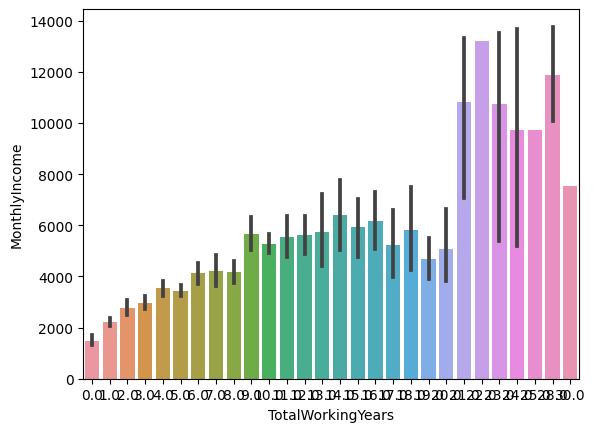

In [113]:
#How TotalWorkingYears related to MonthlyIncome?
sns.barplot(data=df_new, x="TotalWorkingYears", y="MonthlyIncome")

<Axes: xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

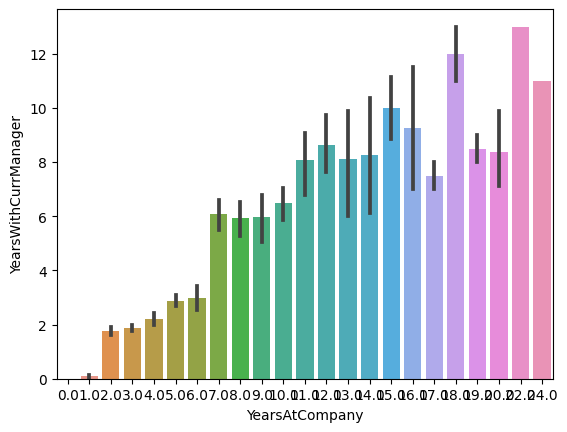

In [114]:
#How YearsAtCompany related to YearswithCurrManager?
sns.barplot(data=df_new, x="YearsAtCompany", y="YearsWithCurrManager")

<Axes: xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

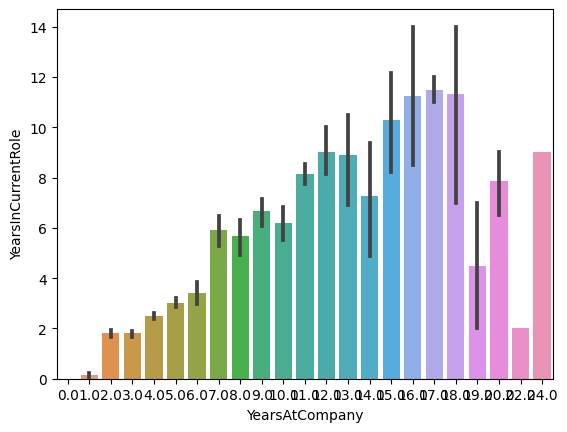

In [115]:
#How YearsAtCompany related to YearsInCurrentRole?
sns.barplot(data=df_new, x="YearsAtCompany", y="YearsInCurrentRole")

<Axes: xlabel='Department', ylabel='PercentSalaryHike'>

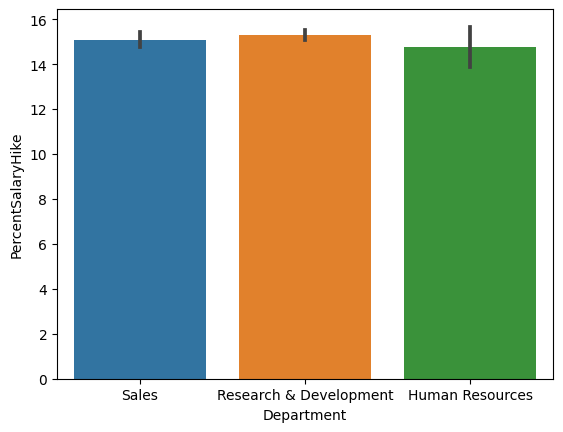

In [116]:
#Which department Employees receive more salary hike?
sns.barplot(data=df2, x="Department", y="PercentSalaryHike")

<Axes: xlabel='EducationField', ylabel='YearsSinceLastPromotion'>

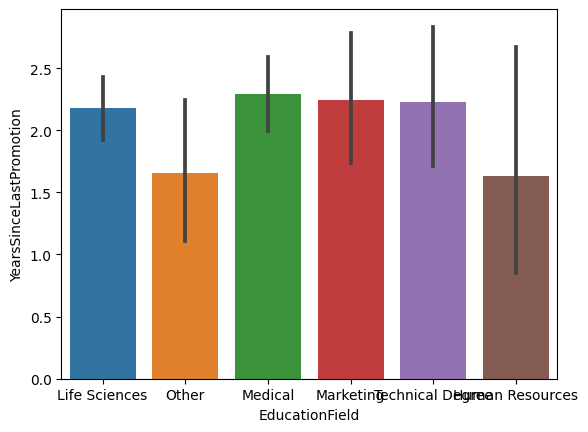

In [117]:
#Which Education Field Employees don’t get promoted easily?
sns.barplot(data=df2, x="EducationField", y="YearsSinceLastPromotion")

<Axes: xlabel='MaritalStatus', ylabel='NumCompaniesWorked'>

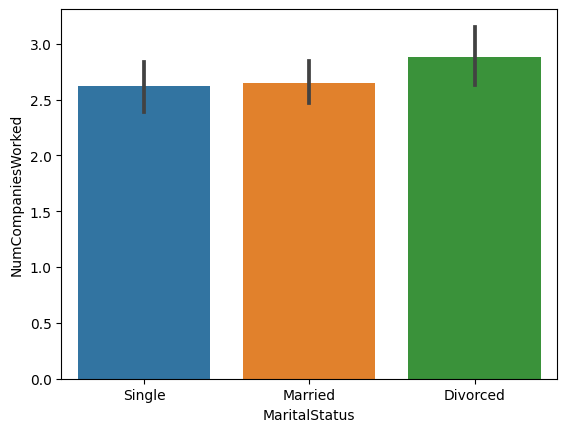

In [118]:
#Does MaritalStatus determines NumCompaniesWorked?
sns.barplot(data=df2, x="MaritalStatus", y="NumCompaniesWorked")

<Axes: xlabel='DailyRate', ylabel='Gender'>

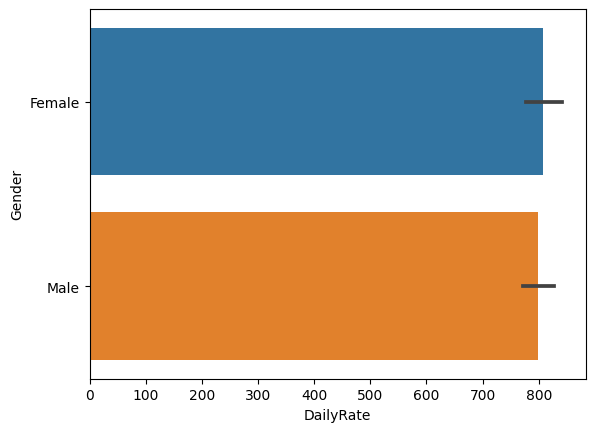

In [119]:
#Is the DailyRate of Mens more than Womens?
sns.barplot(data=df2, x="DailyRate", y="Gender")

<Axes: xlabel='MonthlyIncome', ylabel='EducationField'>

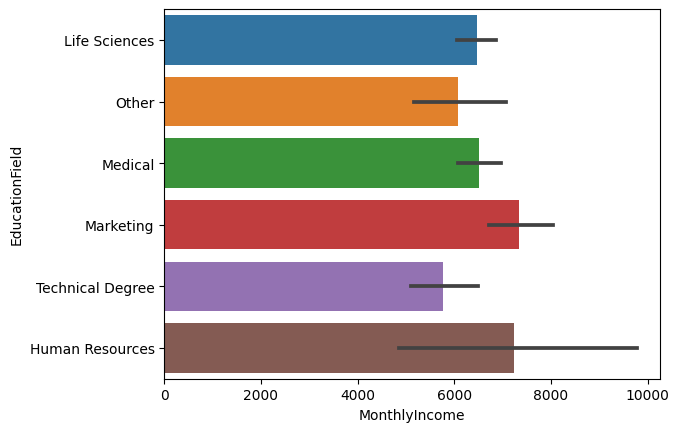

In [120]:
#Which EducationField Employees receive more salary hike?
sns.barplot(data=df2, x="MonthlyIncome", y="EducationField")

# Summary of Correlation:

The higher the JobLevel the higher the MonthlyIncome of an employee.

The higher the TotalWorkingYears the higher the JobLevel.

The higher the TotalWorkingYears the higher the MonthlyIncome of an employee.

YearsAtCompany and YearsWithCurrManager are highly correlated

YearsAtCompany and YearsInCurrentRole are highly correlated


# Summary of Bi-Variate Analysis:

Research&Development Employees receive more salary hike.

Human Resources Employees don’t get promoted easily.

Divorced employees tend to have worked in more number of companies.

DailyRate of Mens and Womens is almost equal.

Marketing Employees receive more salary hike.

# Oversampling Using SMOTE

Since our dataset is imbalanced, we have to balance it

In [121]:
# Split the dataset into features (X) and target variable (y)
from sklearn.model_selection import train_test_split
x=df_new.drop('Attrition',axis='columns')
y=df_new['Attrition']

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
y.value_counts()

0    599
1    133
Name: Attrition, dtype: int64

In [124]:
sm = SMOTE(sampling_strategy='minority')
x_sm, y_sm = sm.fit_resample(x,y)
y_sm.value_counts()

1    599
0    599
Name: Attrition, dtype: int64

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.30,random_state=42,stratify=y_sm) 

In [126]:
y_train.value_counts()

1    419
0    419
Name: Attrition, dtype: int64

In [127]:
y_test.value_counts()

1    180
0    180
Name: Attrition, dtype: int64

# Split Dataset for Training and Testing

In [128]:
# Split the dataset into features (X) and target variable (y)
x=df_new.drop('Attrition',axis='columns')
y=df_new['Attrition']

In [129]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_sm,y_sm,test_size = 0.30,random_state=42,stratify=y_sm) 
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (838, 52)
Shape of testing feature: (360, 52)
Shape of training label: (838,)
Shape of testing label: (360,)


# Feature selection

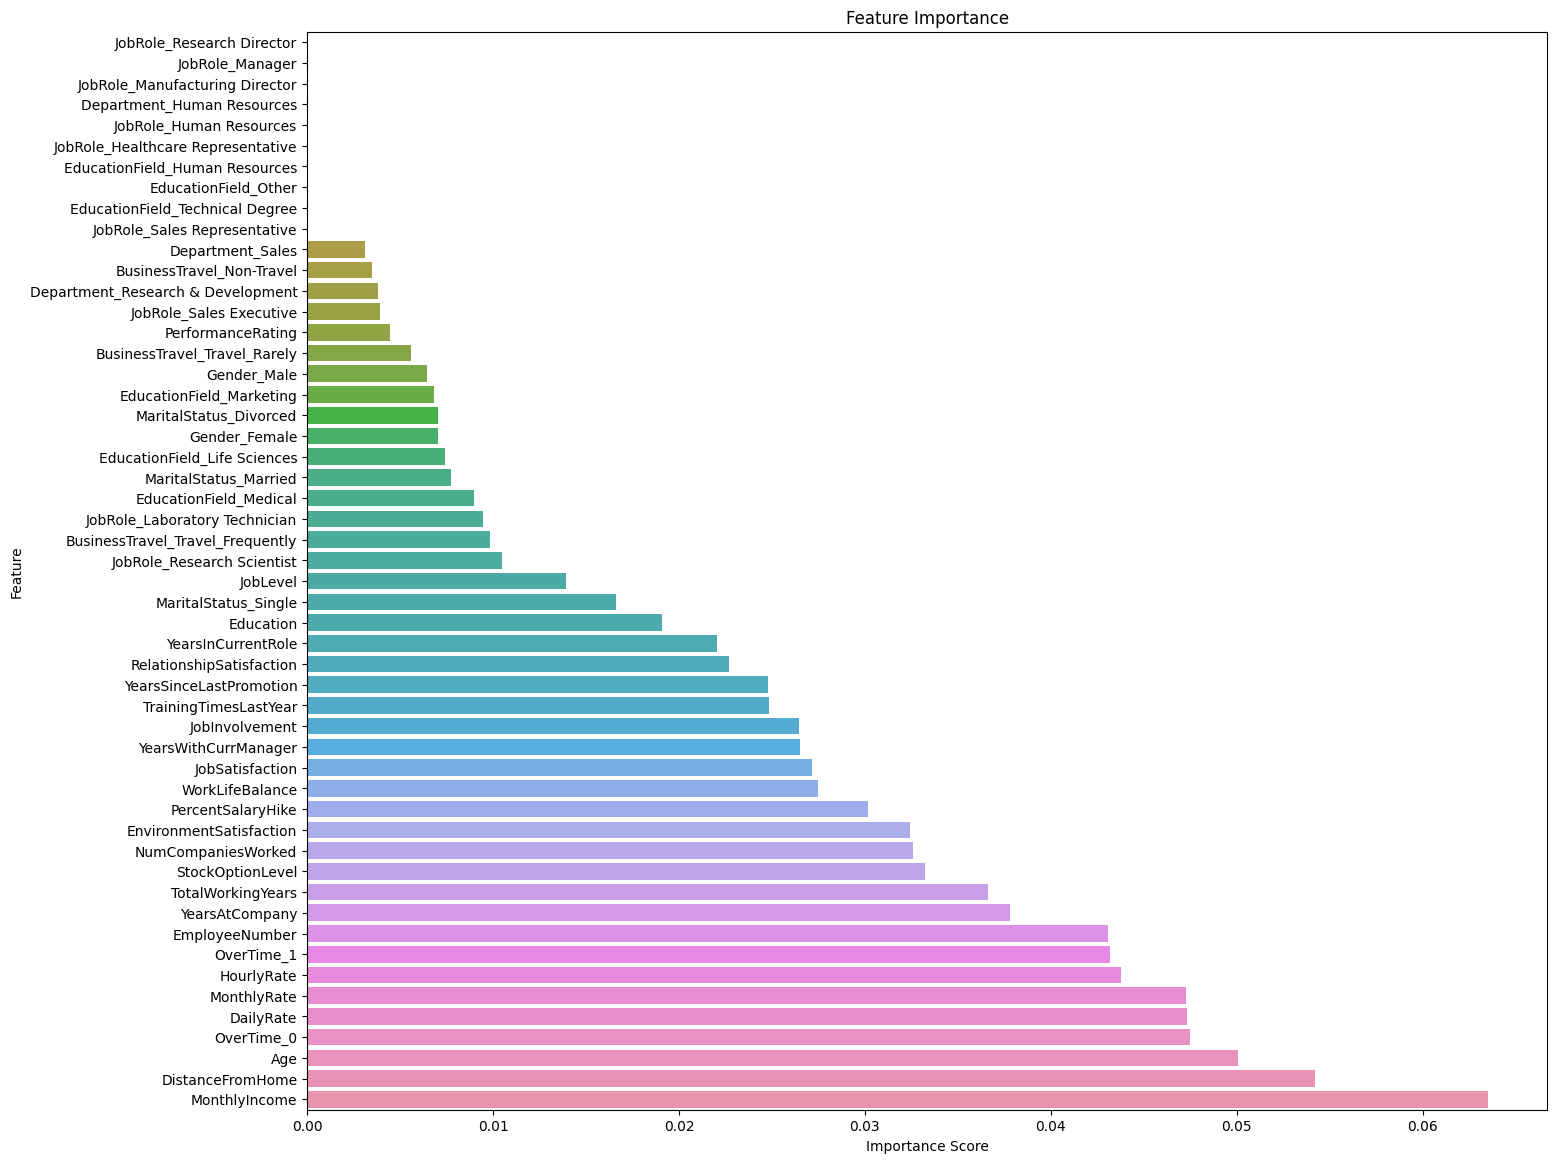

In [130]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf.fit(x, y)
# Extract feature importances from the fitted model
feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
# Sort the features by their importance scores
sorted_feature_importances = feature_importances.sort_values()
# Plot the feature importances in a horizontal bar chart
plt.figure(figsize=(16,14))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Modelling

To evaluate our model we will use the confusion matrix as our base for the evaluation.

There are 6 metrics use to evaluate models:

1.Accuracy: the proportion of true results among the total number of cases examined.

                             Accuracy=TP+TN/TP+TN+FP+FN
                       

2.Precision: used to calculate how much proportion of all data that was predicted positive was actually positive.


                             Precision=TP/TP+FP
                            
3.Recall: used to calculate how much proportion of actual positives is correctly classified.

                             Recall=TP/TP+FN
                             
4.F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.

                             F1=2TP/2TP+FP+FN
                             
Where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.                             
                         


In [131]:
# function to evaluate and calculate accuracy, precision, recall and F1-score 
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics
# Predict Test Data 
    y_pred = model.predict(x_test)
# Calculate accuracy, precision, recall and f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,pos_label='1')
    rec = metrics.recall_score(y_test, y_pred,pos_label='1' )
    f1 = metrics.f1_score(y_test, y_pred,pos_label='1')
# Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
# Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'cm': cm}  

# Applying Machine Learning Algorithms

# Logistic Regression

In [132]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
#Building Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.675
Precision: 0.6779661016949152
Recall: 0.6666666666666666
F1 Score: 0.6722689075630253
Confusion Matrix:
 [[123  57]
 [ 60 120]]


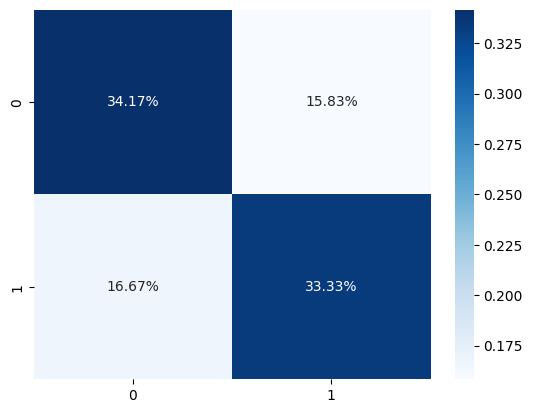

In [133]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Confusion Matrix:\n', lr_eval['cm'])

# Decision Tree

In [134]:
#Decision Tree Model
from sklearn import tree
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.8222222222222222
Precision: 0.8411764705882353
Recall: 0.7944444444444444
F1 Score: 0.8171428571428571
Confusion Matrix:
 [[153  27]
 [ 37 143]]


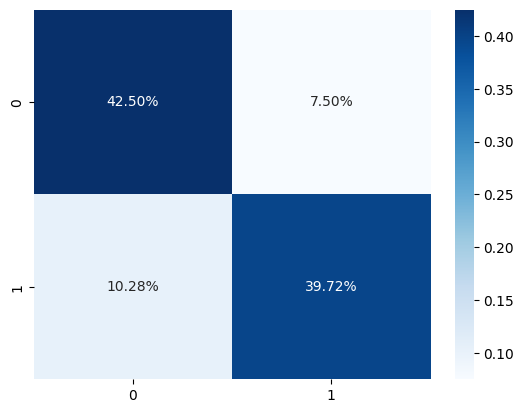

In [135]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix:\n', dtc_eval['cm'])

# Random Forest

In [136]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9333333333333333
Precision: 0.9936708860759493
Recall: 0.8722222222222222
F1 Score: 0.9289940828402367
Confusion Matrix:
 [[179   1]
 [ 23 157]]


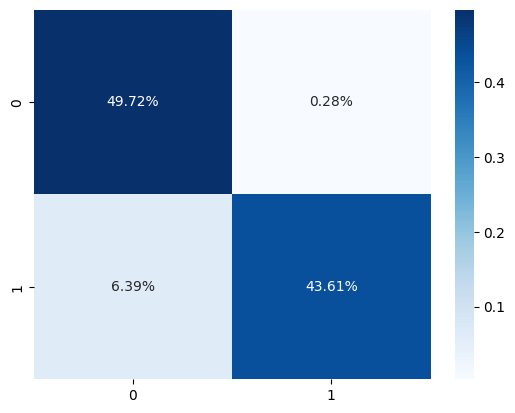

In [137]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Confusion Matrix:\n', rf_eval['cm'])

# Naive Bayes 

In [138]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.875
Precision: 0.8857142857142857
Recall: 0.8611111111111112
F1 Score: 0.8732394366197184
Confusion Matrix:
 [[160  20]
 [ 25 155]]


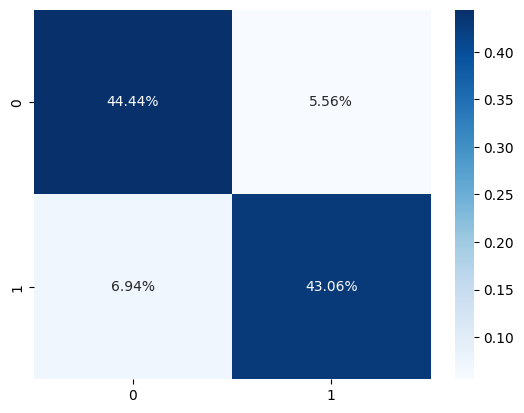

In [139]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Confusion Matrix:\n', nb_eval['cm'])

# K-Nearest Neighbors

In [140]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 0.7194444444444444
Precision: 0.6680851063829787
Recall: 0.8722222222222222
F1 Score: 0.7566265060240963
Confusion Matrix:
 [[102  78]
 [ 23 157]]


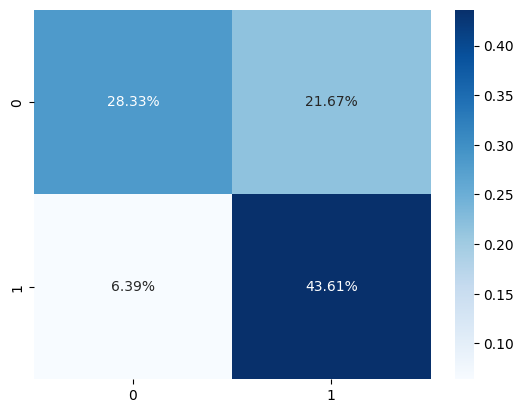

In [141]:
# Evaluate KNN Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Confusion Matrix:\n', knn_eval['cm'])

# Support Vector Machine

In [142]:
#SVM Model
from sklearn.svm import SVC

#Building SVM model
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

Accuracy: 0.5333333333333333
Precision: 0.5348837209302325
Recall: 0.5111111111111111
F1 Score: 0.5227272727272726
Confusion Matrix:
 [[100  80]
 [ 88  92]]


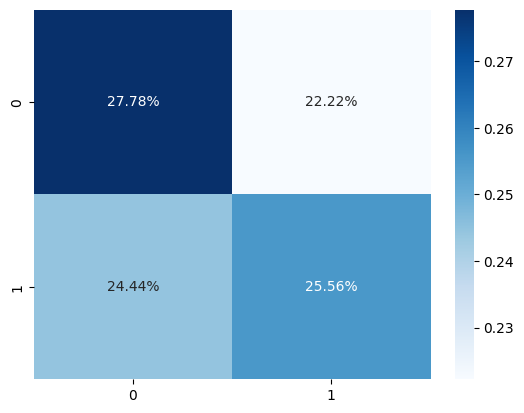

In [143]:
#Evaluate SVM Model
svc_eval=evaluate_model(svc, X_test, y_test)

# Print result
print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Confusion Matrix:\n', svc_eval['cm'])

# Model Comparison

After building all of our model, we can now compare how well each model perform.

To do this we will create a chart, it is a grouped bar chart to display the value of accuracy, precision, recall,  and f1 score of our model.

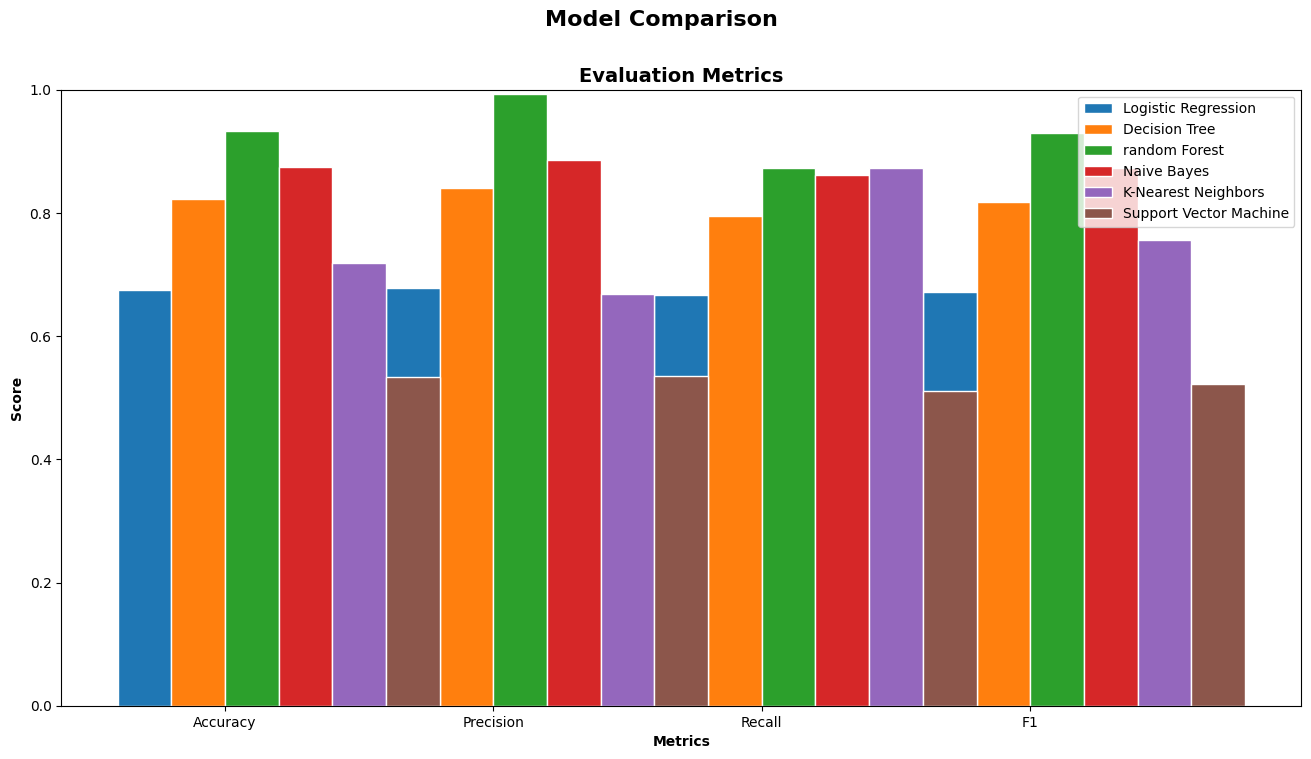

In [144]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
#set bar size
barWidth = 0.2
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
svm_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1']]

#Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


#Make the plot

ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machine')

#Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

#Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
plt.show()

In [157]:
#Model Scores (accuracy)
model_scores={'Logistic Regression':logreg.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svc.score(X_test,y_test),
             'Random forest':rf.score(X_test,y_test),
              'Decision tree':dtc.score(X_test,y_test),
              'Naive Bayes':nb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.675,
 'KNN classifier': 0.7194444444444444,
 'Support Vector Machine': 0.5333333333333333,
 'Random forest': 0.9333333333333333,
 'Decision tree': 0.8222222222222222,
 'Naive Bayes': 0.875}

# Model Comparison based on Accuracy


In [155]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.675,0.719444,0.533333,0.933333,0.822222,0.875


# Visualize the accuracy of each model


<Axes: >

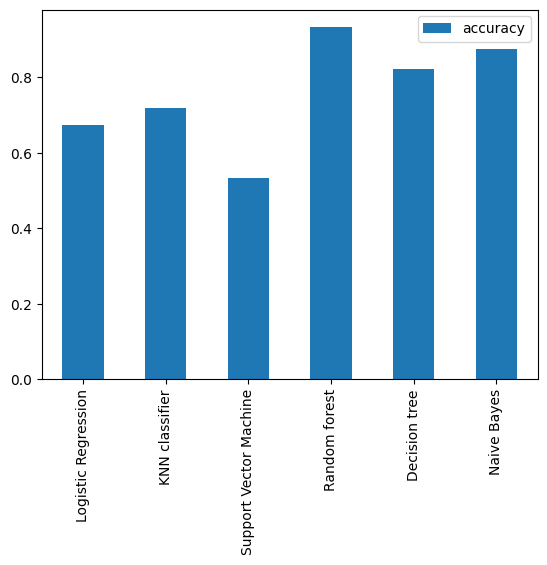

In [156]:
model_compare.T.plot(kind='bar') # T is here for transpose


# Prediction

In [145]:
new_data = pd.DataFrame({
'Age'                                : [40] ,
'DailyRate'                          : [1200] ,
'DistanceFromHome'                   : [15] , 
'Education'                          : [3] ,
'EmployeeNumber'                     : [1000] ,
'EnvironmentSatisfaction'            : [4] ,
'HourlyRate'                         : [70] ,
'JobInvolvement'                     : [4] ,
'JobLevel'                           : [4] ,
'JobSatisfaction'                    : [4] ,
'MonthlyIncome'                      : [16000] ,
'MonthlyRate'                        : [23000] ,
'NumCompaniesWorked'                 : [15] ,
'PercentSalaryHike'                  : [25] ,
'PerformanceRating'                  : [3] ,
'RelationshipSatisfaction'           : [4] ,
'StockOptionLevel'                   : [3] ,
'TotalWorkingYears'                  : [26] ,
'TrainingTimesLastYear'              : [3] ,
'WorkLifeBalance'                    : [4] ,
'YearsAtCompany'                     : [26] ,
'YearsInCurrentRole'                 : [8] ,
'YearsSinceLastPromotion'            : [9] ,
'YearsWithCurrManager'               : [12] ,
'BusinessTravel_Non-Travel'          : [1] ,
'BusinessTravel_Travel_Frequently'   : [0] ,
'BusinessTravel_Travel_Rarely'       : [0] ,
'Department_Human Resources'         : [1] ,
'Department_Research & Development'  : [0] ,
'Department_Sales'                   : [0] ,
'EducationField_Human Resources'     : [0] ,
'EducationField_Life Sciences'       : [1] ,
'EducationField_Marketing'           : [0] ,
'EducationField_Medical'             : [0] ,
'EducationField_Other'               : [0] ,
'EducationField_Technical Degree'    : [0] ,
'Gender_Female'                      : [1] ,
'Gender_Male'                        : [0] ,
'JobRole_Healthcare Representative'  : [0] ,
'JobRole_Human Resources'            : [1] ,
'JobRole_Laboratory Technician'      : [0] ,
'JobRole_Manager'                    : [0] ,
'JobRole_Manufacturing Director'     : [0] ,
'JobRole_Research Director'          : [0] ,
'JobRole_Research Scientist'         : [0] ,
'JobRole_Sales Executive'            : [0] ,
'JobRole_Sales Representative'       : [0] ,
'MaritalStatus_Divorced'             : [1] ,
'MaritalStatus_Married'              : [0] ,
'MaritalStatus_Single'               : [0] ,
'OverTime_0'                         : [0] ,
'OverTime_1'                         : [1] ,
})

In [181]:
y_predi = nb.predict(new_data)
print(y_predi)

['0']
